Link data source: [100,000 UK Used Car Data set](https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes?datasetId=750216)

### Bài toán: Dự đoán tên nhãn hàng của xe hơi dựa trên các đặc trưng của xe sử dụng Random Forests

### Thông tin các cột trên dataset
* Model: Tên mẫu xe
* Year: Năm đăng kí xe
* Price: Giá xe, tính bằng Bảng Anh
* Transmission: Loại hộp số (Automatic, Manual, Auto-Semi)
* Mileage: Quãng đường xe đã chạy
* FuelType: Nhiên liệu động cơ (Diesel, Petrol, Hybrid, ... )
* Tax: Thuế đường bộ
* mpg: miles per gallon(số dặm đi được trên 1 gallon nhiên liệu)
* engineSize: Kích thước của động cơ (tính bằng lít)
* brand: Tên hãng xe hơi (audi/bmw/merc/toyota)


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import seaborn as sns
import os
from sklearn.metrics import classification_report

In [2]:
#load data
path =r'./data'
paths=(os.listdir(path))
data=pd.DataFrame()
for i in paths:
    data_samble=pd.read_csv(os.path.join(path,i))
    data_samble['brand']=(i.split('.')[0])
    data = pd.concat([data,data_samble], axis=0)
    
data =  data.reset_index(drop=True)

data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
41301,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0,toyota
41302,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3,toyota
41303,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4,toyota
41304,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3,toyota


In [3]:
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
brand           0
dtype: int64

### Train, Test split

In [4]:
# Phân chia tập train, tập test
df_train = pd.DataFrame()
df_test = pd.DataFrame()
train, test = train_test_split(data, test_size=0.3, random_state=30)
df_train = pd.concat([df_train, train])
df_test = pd.concat([df_test, test])
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
print(df_train.shape)
print(df_test.shape)

(28914, 10)
(12392, 10)


### EDA

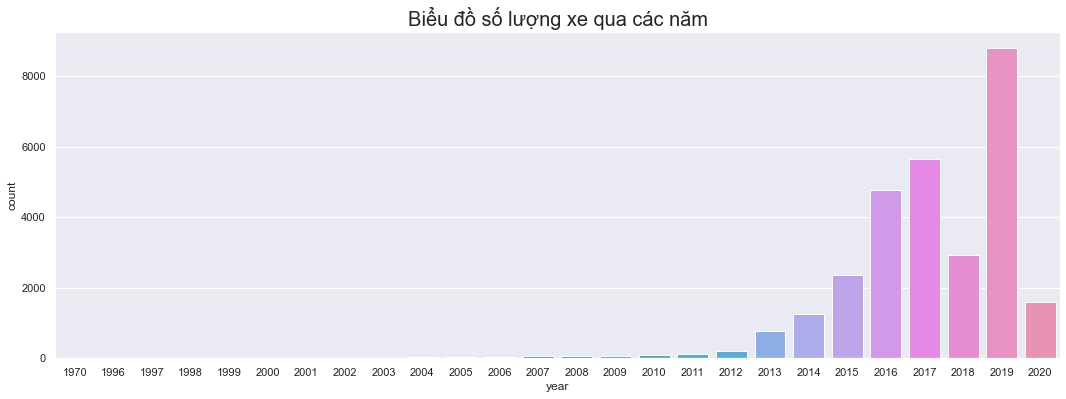

In [5]:
plt.figure(figsize=(18,6))
sns.set_theme(style="darkgrid")
plt.title("Biểu đồ số lượng xe qua các năm",size=20)
sns.countplot(x = df_train["year"])
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=15)

#### Biểu số lượng mẫu xe qua các năm (1970-2020)
* Trước năm 2013, số lượng mẫu xe cho ra mắt khá ít, về sau nhiều mẫu xe hiện đại hơn ra đời
* Số lượng mẫu xe đạt đỉnh ở năm 2019 với  4 tập đoàn audi, bmw, mercedes, toyota

-Kết luận: Đời sống càng phát triễn dẫn đến nhu cầu về xe hơi càng nhiều => sản xuất nhiều mẫu xe

____

Text(0.5, 0, 'Price (pound)')

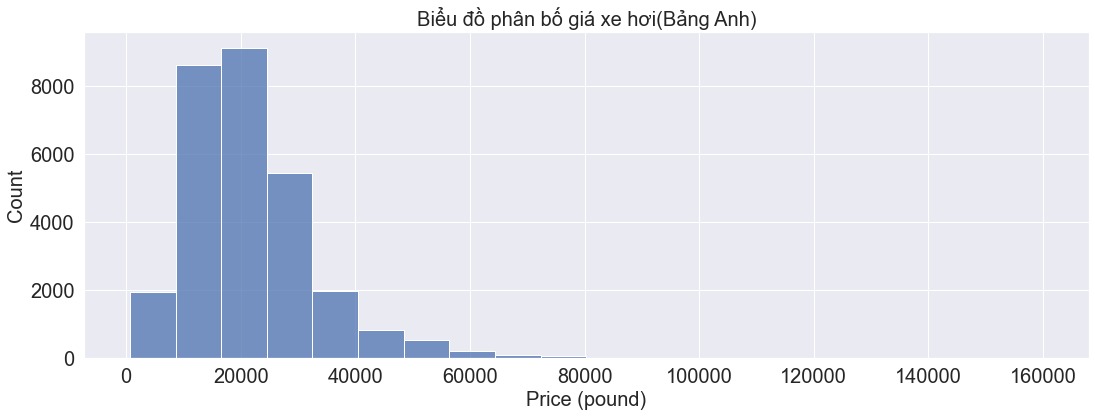

In [6]:
plt.figure(figsize=(18,6))
plt.title("Biểu đồ phân bố giá xe hơi(Bảng Anh)",size=20)
sns.histplot(df_train['price'], bins=20)
plt.xlabel('Price (pound)')

### Biểu đồ phân bố giá xe hơi(Bảng Anh)
* Biểu đồ có dạng phân bố chuẩn
* Giá xe tập trung chủ yếu từ 10000 Pound - 40000 Pound

____

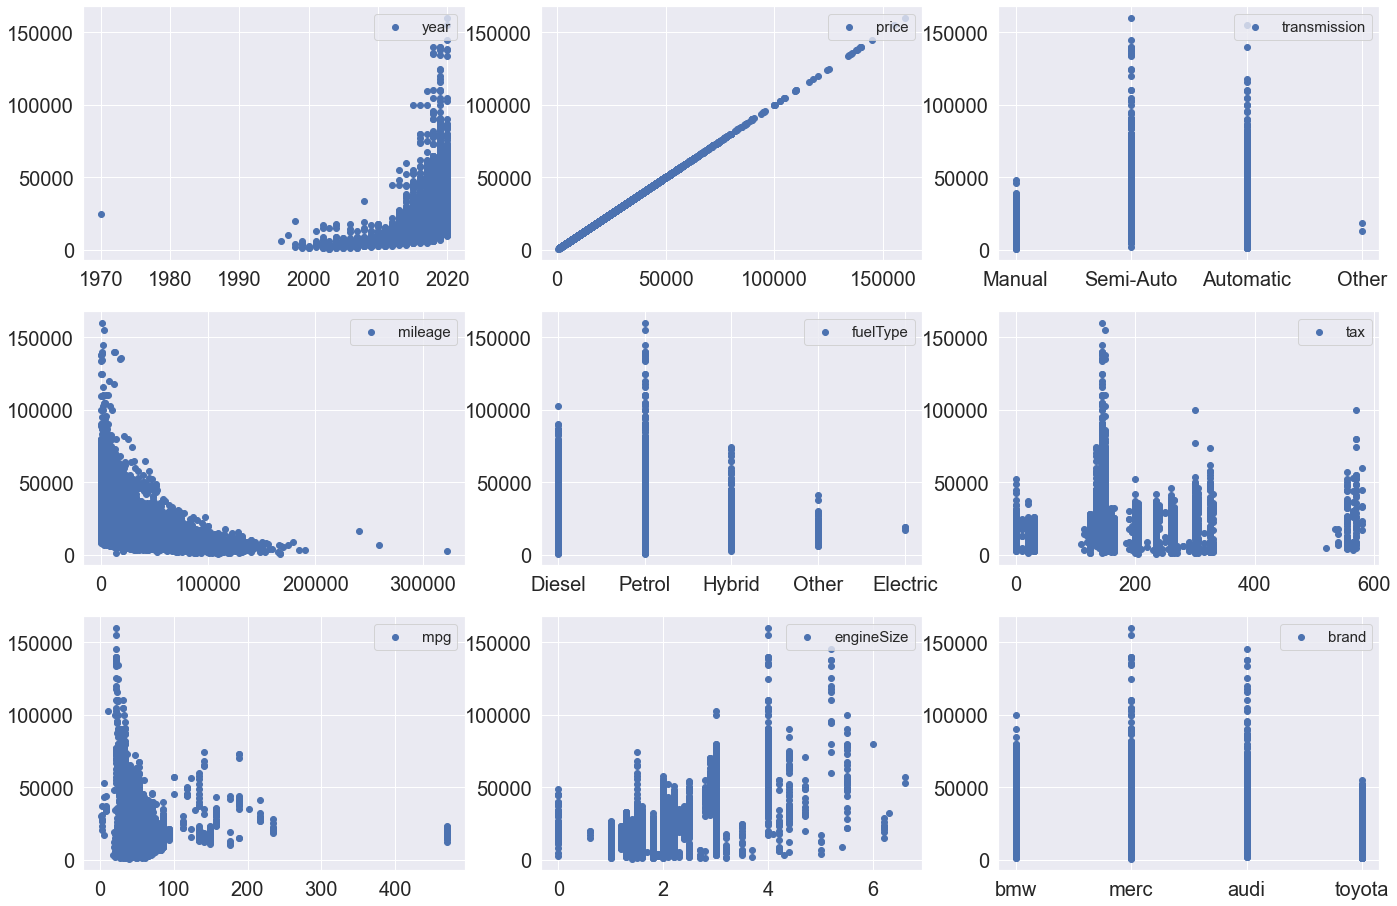

In [7]:
fig,axs=plt.subplots(3,3)
feature=list(df_train.drop('model',axis=1).columns)
index=-1
for row in range(3):
    for columns in range(3):
        index+=1
        axs[row,columns].scatter(df_train[feature[index]],df_train['price'],label=f'{feature[index]}')
        axs[row,columns].legend(loc=1)
        
plt.subplots_adjust(left=0,right=3,bottom=0,top=3)
plt.rc('legend', fontsize=20)

### Biểu đồ quan hệ giữa giá tiền(price) và các đặc trưng khác trong dataset

____

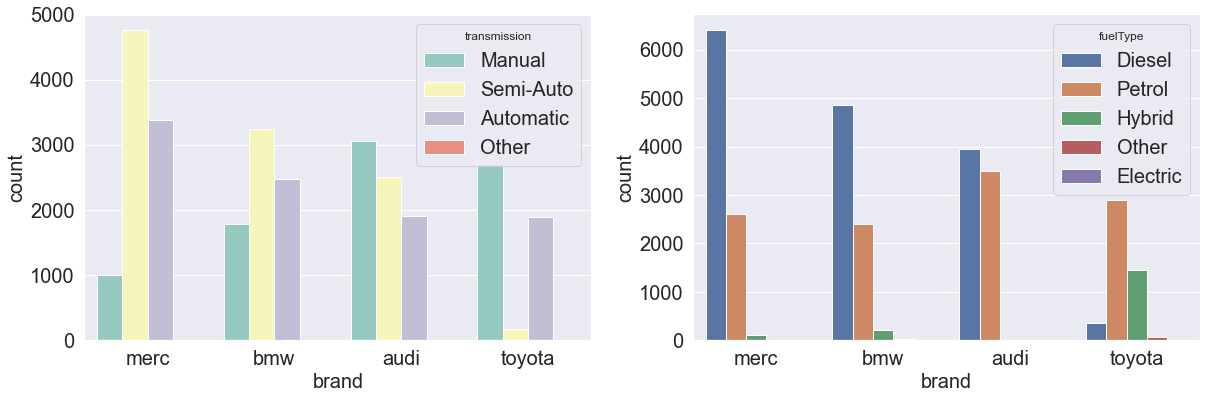

In [8]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot(x= 'brand', hue= 'transmission', data = df_train, order=df_train['brand'].value_counts().index, palette="Set3")
plt.subplot(1,2,2)
sns.countplot(x= 'brand', hue= 'fuelType', data = df_train, order=df_train['brand'].value_counts().index)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20) 
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=5)

### Biểu đồ mức độ hãng xe sử dụng hộp số và loại nhiên liệu
* Các loại xe sử dụng hộp số bán tự động khá nhiều, riêng loại xe toyota thường sử dụng hộp số tay, hộp số tự động
* Các loại xe chạy nhiên liệu dầu Diesel và Petrol khá nhiều, toyota sử dụng Petrol và Hybrid

____

In [9]:
def Outliers(dataframe,cols):
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    numeric_col2=[]
    for x in cols:
        numeric_col2.append(x)

    fig=make_subplots(rows=1, cols=len(cols))

    for i,col in enumerate(numeric_col2):
        fig.add_trace(go.Box(y=dataframe[col].values, name=dataframe[col].name), row=1, col=i+1)

    return fig.show()

cols=['engineSize', 'price', 'mpg', 'mileage', 'tax']
Outliers(df_train,cols)

### Feature Extraction

In [10]:
print(df_train['transmission'].value_counts())
print(df_train['fuelType'].value_counts())

Semi-Auto    10703
Automatic     9659
Manual        8550
Other            2
Name: transmission, dtype: int64
Diesel      15579
Petrol      11429
Hybrid       1805
Other          98
Electric        3
Name: fuelType, dtype: int64


In [11]:
df_train =  df_train.drop('model', axis=1)
df_train_encode = df_train.copy()

df_train_encode=df_train_encode.drop(["year"],axis=1)
df_train_encode=df_train_encode.drop(["price"],axis=1)
df_train_encode=df_train_encode.drop(["mileage"],axis=1)
df_train_encode=df_train_encode.drop(["tax"],axis=1)
df_train_encode=df_train_encode.drop(["mpg"],axis=1)
df_train_encode=df_train_encode.drop(["engineSize"],axis=1)
df_train_encode=df_train_encode.drop(["brand"],axis=1)

df_train_encode=df_train_encode.apply(preprocessing.LabelEncoder().fit_transform)

# transmission và fuelType là các trường được encode
df_train=df_train.drop(["transmission"],axis=1)
df_train=df_train.drop(["fuelType"],axis=1)

df_train=pd.concat([df_train,df_train_encode],axis=1)

,year,price,mileage,tax,mpg,engineSize,brand,transmission,fuelType
0,2015,13111,23320,20,70.6,2.0,bmw,1,0
1,2019,42399,2293,145,32.9,2.0,merc,3,4
2,2019,28000,4000,145,33.2,2.0,audi,0,4
3,2020,30990,10,145,39.8,2.0,audi,0,4
4,2019,22990,5268,135,72.4,2.0,toyota,0,2
...,...,...,...,...,...,...,...,...,...
28909,2017,19750,24610,125,58.9,2.1,merc,0,0
28910,2015,16498,14146,125,60.1,2.0,audi,1,0
28911,2017,18450,27363,20,67.3,2.1,merc,3,0
28912,2019,25490,11130,145,42.8,2.0,audi,1,0


### Chuẩn hóa các đặc trưng và xem đặc trưng nào quan trọng hơn

In [13]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(df_train.drop('brand', axis=1)),columns=df_train.drop('brand', axis=1).columns)
df_minmax = pd.concat([df_minmax, df_train['brand']],axis=1)
df_minmax.head()

,year,price,mileage,tax,mpg,engineSize,transmission,fuelType,brand
0,0.90,0.078199,0.072195,0.034483,0.147967,0.30303,0.333333,0.0,bmw
1,0.98,0.261997,0.007096,0.250000,0.067703,0.30303,1.000000,1.0,merc
2,0.98,0.171636,0.012381,0.250000,0.068341,0.30303,0.000000,1.0,audi
3,1.00,0.190400,0.000028,0.250000,0.082393,0.30303,0.000000,1.0,audi
4,0.98,0.140195,0.016307,0.232759,0.151799,0.30303,0.000000,0.5,toyota


Text(0, 0.5, 'Feature Name')

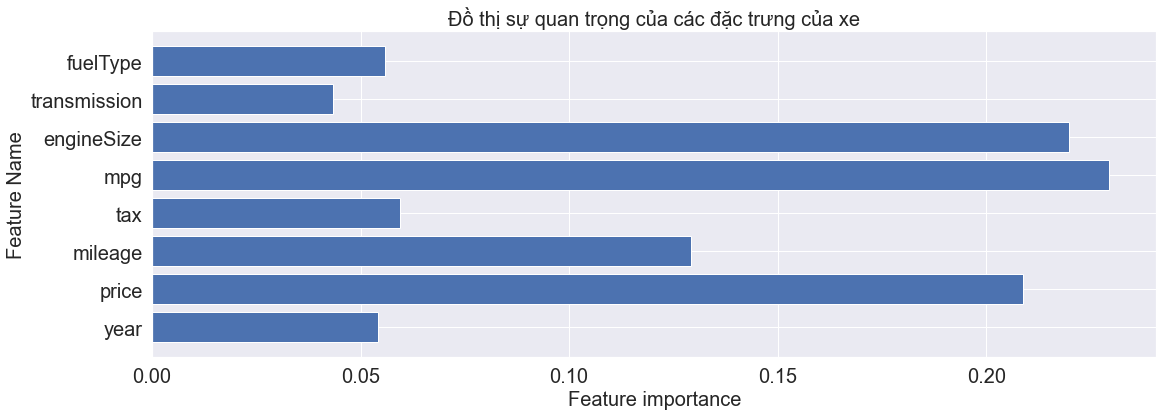

In [14]:
rf = RandomForestClassifier(random_state=42)
rf.fit(df_minmax.drop('brand',axis=1), df_minmax['brand'])

plt.figure(figsize=(18,6))
plt.barh(df_minmax.drop('brand',axis=1).columns.tolist(),rf.feature_importances_)
plt.title("Đồ thị sự quan trọng của các đặc trưng của xe")
plt.xlabel('Feature importance')
plt.ylabel('Feature Name')

###  =>Chọn đặc trưng 'engineSize', 'price', 'mileage' 'mpg'

In [15]:
df_train_model = df_train.copy()
df_train_model = df_train_model.drop(['year', 'fuelType', 'tax','transmission'], axis=1)
df_train_model

,price,mileage,mpg,engineSize,brand
0,13111,23320,70.6,2.0,bmw
1,42399,2293,32.9,2.0,merc
2,28000,4000,33.2,2.0,audi
3,30990,10,39.8,2.0,audi
4,22990,5268,72.4,2.0,toyota
...,...,...,...,...,...
28909,19750,24610,58.9,2.1,merc
28910,16498,14146,60.1,2.0,audi
28911,18450,27363,67.3,2.1,merc
28912,25490,11130,42.8,2.0,audi


In [16]:
df_test = df_test.drop(['year', 'fuelType', 'tax','transmission','model'], axis=1)

,price,mileage,mpg,engineSize,brand
0,18765,47348,94.1,1.8,toyota
1,33975,11,51.4,3.0,bmw
2,19298,11349,47.9,1.6,audi
3,25000,5779,40.9,1.5,audi
4,14670,55411,47.9,2.0,audi
...,...,...,...,...,...
12387,11999,29704,80.7,1.6,audi
12388,17299,11684,67.3,2.1,merc
12389,31990,5,39.8,2.0,bmw
12390,14991,37092,68.9,2.1,merc


### Tìm hyperparameters cho Model

In [17]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
random_grid = {'n_estimators': [90, 100, 110, 120, 130, 140],
               'max_depth':  [5,10, 20, 30, 40, 50, None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
                'bootstrap': [True, False]
}
search=RandomizedSearchCV(RandomForestClassifier(),random_grid,cv=5,scoring='accuracy')
search.fit(df_train_model.drop('brand', axis=1),df_train_model['brand'])

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 20, 30, 40, 50,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [90, 100, 110, 120, 130,
                                                         140]},
                   scoring='accuracy')

In [18]:
print("Best param: ",search.best_params_)

Best param:  {'n_estimators': 120, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 50, 'bootstrap': True}


In [29]:
def Predict(df_train_model, df_test):
    X_train = df_train_model.drop('brand', axis=1)
    X_test = df_test.drop('brand', axis=1)
    y_train = df_train_model['brand']
    y_test = df_test['brand']

    model = RandomForestClassifier(n_estimators=120,max_depth=40,min_samples_split=10,min_samples_leaf=1,random_state=42)
    model.fit(X_train,y_train)
    X_test_prediction = model.predict(X_test)
    
    return model

In [37]:
model =  Predict(df_train_model, df_test)

# price	mileage	mpg	engineSize
newInput = [[28765,57348,94.1,2.8]]
print(model.predict(newInput)[0])

merc


c:\Users\MSI GF63\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [40]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))